In [70]:
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd 



In [71]:
import string
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [72]:
df = pd.read_excel('D:\Becode_Projects\Movie-Recommendation-System\The Movies Dataset\Movies_small_metadata.xlsx')

(-1.25, 1.25, -1.25, 1.25)

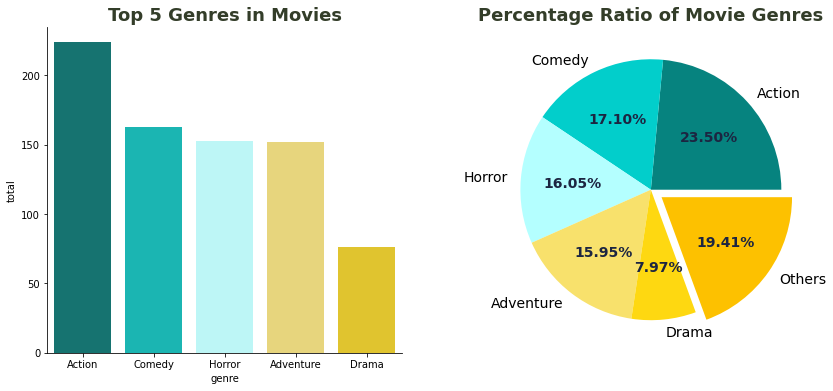

In [73]:

genres_list = []
for i in df['genres']:
    genres_list.extend(i.split(', '))

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,6))

df_plot = pd.DataFrame(Counter(genres_list).most_common(5), columns=['genre', 'total'])
ax = sns.barplot(data=df_plot, x='genre', y='total', ax=axes[0], palette=['#06837f', '#02cecb', '#b4ffff', '#f8e16c', '#fed811'])
ax.set_title('Top 5 Genres in Movies', fontsize=18, weight=600, color='#333d29')
sns.despine()

df_plot_full = pd.DataFrame([Counter(genres_list)]).transpose().sort_values(by=0, ascending=False)
df_plot.loc[len(df_plot)] = {'genre': 'Others', 'total':df_plot_full[6:].sum()[0]}
plt.title('Percentage Ratio of Movie Genres', fontsize=18, weight=600, color='#333d29')
wedges, texts, autotexts = axes[1].pie(x=df_plot['total'], labels=df_plot['genre'], autopct='%.2f%%',
                                       textprops=dict(fontsize=14), explode=[0,0,0,0,0,0.1], colors=['#06837f', '#02cecb', '#b4ffff', '#f8e16c', '#fed811', '#fdc100'])

for autotext in autotexts:
    autotext.set_color('#1c2541')
    autotext.set_weight('bold')

axes[1].axis('off')

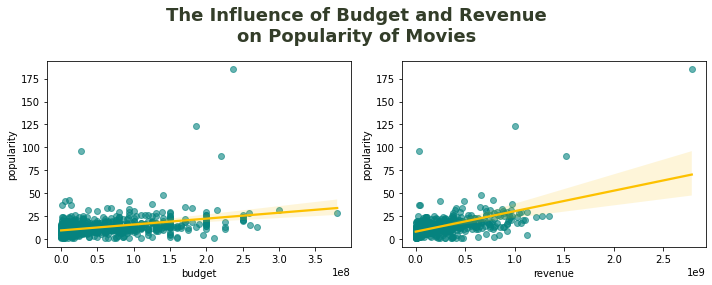

In [74]:
df_plot = df[(df['budget'] != 0) & (df['revenue'] != 0)]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

plt.suptitle('The Influence of Budget and Revenue\non Popularity of Movies', fontsize=18, weight=600, color='#333d29')
for i, col in enumerate(['budget', 'revenue']):
    sns.regplot(data=df_plot, x=col, y='popularity',
                scatter_kws={"color": "#06837f", "alpha": 0.6}, line_kws={"color": "#fdc100"}, ax=axes[i])

plt.tight_layout()

Text(0.5, 1.0, 'The Relationship Between Average Vote and Popularity')

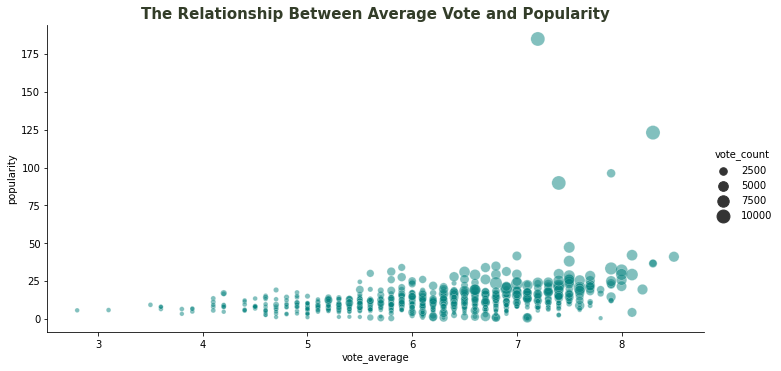

In [75]:
sns.relplot(data=df, x='vote_average', y='popularity', size='vote_count',
            sizes=(20, 200), alpha=.5, aspect=2, color='#06837f')
plt.title('The Relationship Between Average Vote and Popularity', fontsize=15, weight=600, color='#333d29')

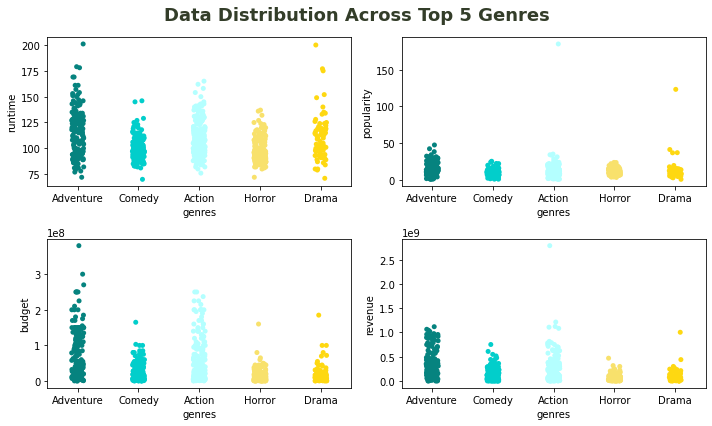

In [76]:
df_plot = pd.DataFrame(Counter(genres_list).most_common(5), columns=['genre', 'total'])
df_plot = df[df['genres'].isin(df_plot['genre'].to_numpy())]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,6))

plt.suptitle('Data Distribution Across Top 5 Genres', fontsize=18, weight=600, color='#333d29')
for i, y in enumerate(['runtime', 'popularity', 'budget', 'revenue']):
    sns.stripplot(data=df_plot, x='genres', y=y, ax=axes.flatten()[i], palette=['#06837f', '#02cecb', '#b4ffff', '#f8e16c', '#fed811'])

plt.tight_layout()

<AxesSubplot: title={'center': 'Correlation of Movie Features\n'}>

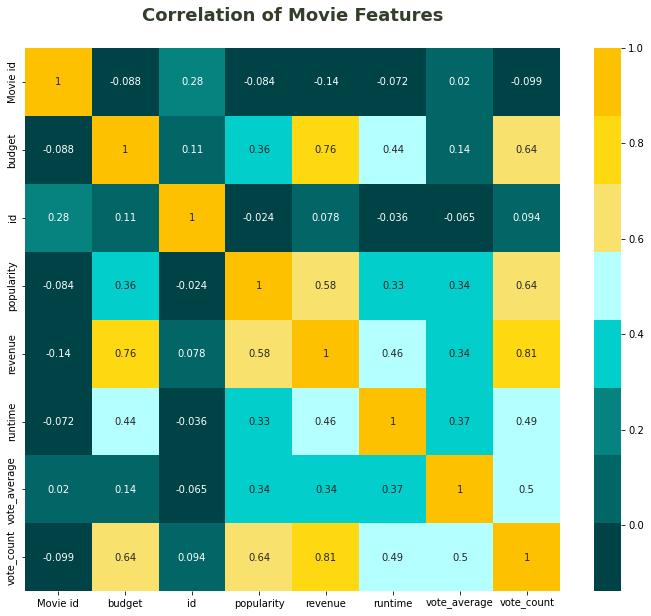

In [77]:
plt.figure(figsize=(12,10))
plt.title('Correlation of Movie Features\n', fontsize=18, weight=600, color='#333d29')
sns.heatmap(df.corr(), annot=True, cmap=['#004346', '#036666', '#06837f', '#02cecb', '#b4ffff', '#f8e16c', '#fed811', '#fdc100'])

In [78]:
df1 = pd.read_excel('D:\Becode_Projects\Movie-Recommendation-System\The Movies Dataset\\rating_excel.xlsx')

In [79]:
df1.head(2)

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435


In [80]:


# Zet de kolom 'id' in movies_metadata.csv en 'movieId' in ratings.csv om naar hetzelfde datatype als 'id' in movies_metadata.csv
df['id'] = pd.to_numeric(df['id'])
df1['Id'] = pd.to_numeric(df1['userId'])

# Hernoem de kolom 'movieId' in 'id' in het ratings dataframe
df1 = df1.rename(columns={'userId': 'id'})

# Merge de twee dataframes op basis van de kolom 'id'
merged = pd.merge(df, df1, on='id', how='left')

In [81]:
merged.head(20)

,Movie id,budget,genres,id,imdb_id,original_language,original_title,popularity,production_companies,Countries,release_date,revenue,runtime,Movies Name,vote_average,vote_count,movieId,rating,timestamp,Id
0,10194,30000000,Animation,862,tt0114709,English,Toy Story,21.946943,Pixar Animation Studios,United States of America,10/30/1995,373554033,81,Toy Story,7.7,5415,50.0,4.0,965083886.0,862.0
1,10194,30000000,Animation,862,tt0114709,English,Toy Story,21.946943,Pixar Animation Studios,United States of America,10/30/1995,373554033,81,Toy Story,7.7,5415,318.0,5.0,965083886.0,862.0
2,10194,30000000,Animation,862,tt0114709,English,Toy Story,21.946943,Pixar Animation Studios,United States of America,10/30/1995,373554033,81,Toy Story,7.7,5415,593.0,5.0,965083886.0,862.0
3,10194,30000000,Animation,862,tt0114709,English,Toy Story,21.946943,Pixar Animation Studios,United States of America,10/30/1995,373554033,81,Toy Story,7.7,5415,858.0,4.0,965083886.0,862.0
4,10194,30000000,Animation,862,tt0114709,English,Toy Story,21.946943,Pixar Animation Studios,United States of America,10/30/1995,373554033,81,Toy Story,7.7,5415,912.0,4.0,965083717.0,862.0
5,10194,30000000,Animation,862,tt0114709,English,Toy Story,21.946943,Pixar Animation Studios,United States of America,10/30/1995,373554033,81,Toy Story,7.7,5415,1198.0,5.0,965083976.0,862.0
6,10194,30000000,Animation,862,tt0114709,English,Toy Story,21.946943,Pixar Animation Studios,United States of America,10/30/1995,373554033,81,Toy Story,7.7,5415,1204.0,5.0,965083886.0,862.0
7,10194,30000000,Animation,862,tt0114709,English,Toy Story,21.946943,Pixar Animation Studios,United States of America,10/30/1995,373554033,81,Toy Story,7.7,5415,1361.0,4.0,965083961.0,862.0
8,10194,30000000,Animation,862,tt0114709,English,Toy Story,21.946943,Pixar Animation Studios,United States of America,10/30/1995,373554033,81,Toy Story,7.7,5415,2376.0,3.0,965083717.0,862.0
9,10194,30000000,Animation,862,tt0114709,English,Toy Story,21.946943,Pixar Animation Studios,United States of America,10/30/1995,373554033,81,Toy Story,7.7,5415,2459.0,3.0,965083717.0,862.0


In [82]:
merged.to_csv("D:\Becode_Projects\Movie-Recommendation-System\The Movies Dataset\movies_mearged.csv")